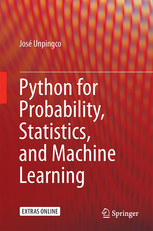

In [6]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

In [7]:
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In a previous coin-flipping discussion, we discussed estimation of the
underlying probability of getting a heads. There, we derived the
estimator as

$$
\hat{p}_n = \frac{1}{n}\sum_{i=1}^n X_i
$$

 where $X_i\in \lbrace 0,1 \rbrace$. Confidence intervals allow us to
estimate how close we can get to the true value that we are estimating.
Logically, that seems strange, doesn't it? We really don't know the exact value
of what we are estimating (otherwise, why estimate it?), and yet, somehow we
know how close we can get to something we admit we don't know? Ultimately, we
want to make statements like the *probability of the value in a certain
interval is 90\%*. Unfortunately, that is something we will not be able to say
using our methods. Note that Bayesian estimation gets closer to this statement
by using *credible intervals*, but that is a story for another day. In our
situation, the best we can do is say roughly the following: *if we ran the
experiment multiple times, then the confidence interval would trap the true
parameter 90\% of the time*.

Let's return to our coin-flipping example and see this in action. One
way to get at a confidence interval is to use Hoeffding's inequality
from the section ref{ch:prob:sec:ineq}
specialized to our Bernoulli variables as

$$
\mathbb{P}(\mid \hat{p}_n-p\mid >\epsilon) \leq 2 \exp(-2n \epsilon^2)
$$

 Now, we can form the interval
$\mathbb{I}=[\hat{p}_n-\epsilon_n,\hat{p}_n+\epsilon_n]$, where $\epsilon_n$ is
carefully constructed as

$$
\epsilon_n = \sqrt{ \frac{1}{2 n}\log\frac{2}{\alpha}}
$$

 which makes the right-side of the Hoeffding inequality equal to
$\alpha$. Thus, we finally have

$$
\mathbb{P}(p \notin \mathbb{I}) = \mathbb{P}\left(\mid \hat{p}_n-p\mid >\epsilon_n\right) \leq \alpha
$$

Thus, $ \mathbb{P}(p \in \mathbb{I})
\geq 1-\alpha$. As a numerical example, let's take $n=100$, $\alpha=0.05$, then plugging into everything we have gives $\epsilon_n=0.136$.
So, the 95\% confidence interval here is therefore

$$
\mathbb{I}=[\hat{p}_n-\epsilon_n,\hat{p}_n+\epsilon_n] = [\hat{p}_n-0.136,\hat{p}_n+0.136]
$$

The following code sample is a simulation to see if we can really trap
the underlying parameter in our confidence interval.

In [8]:
from scipy import stats
import numpy as np

b= stats.bernoulli(.5) # fair coin distribution
nsamples = 100
# flip it nsamples times for 200 estimates
xs = b.rvs(nsamples*200).reshape(nsamples,-1) 
phat = np.mean(xs,axis=0) # estimated p
# edge of 95% confidence interval
epsilon_n=np.sqrt(np.log(2/0.05)/2/nsamples) 
pct=np.logical_and(phat-epsilon_n<=0.5, 
                   0.5 <= (epsilon_n +phat)
                   ).mean()*100
print 'Interval trapped correct value ', pct,'% of the time'

Interval trapped correct value  99.0 % of the time


<!-- # @@@CODE src-statistics/Confidence_Intervals.py fromto: from scipy@#end -->

 The result shows that the estimator and the corresponding
interval was able to trap the true value at least 95\% of the time. This is how
to interpret the action of confidence intervals.

However, the usual practice is to not use Hoeffding's inequality and
instead use arguments around asymptotic normality.
The definition of the standard error is the following:

$$
\texttt{se} = \sqrt{\mathbb{V}(\hat{\theta}_n)}
$$

 where $\hat{\theta}_n$ is the point-estimator for the parameter
$\theta$, given $n$ samples of data $X_n$, and $\mathbb{V}(\hat{\theta}_n)$ is
the variance of $\hat{\theta}_n$. Likewise, the estimated standard error is
$\widehat{\texttt{se}}$. For example, in our coin-flipping example, the estimator
was $\hat{p}=\sum X_i/n$ with corresponding variance
$\mathbb{V}(\hat{p}_n)=p(1-p)/n$.  Plugging in the point estimate gives us the
estimated standard error: $\widehat{\texttt{se}}=\sqrt{\hat{p}(1-\hat{p})/n}$.
Because maximum likelihood estimators are asymptotically normal [^mle], we know
that $\hat{p}_n \sim \mathcal{N}(p,\widehat{\texttt{se}}^2)$. Thus, if we want
a $1-\alpha$ confidence interval, we can compute

[^mle]: Certain technical regularity conditions must hold for this property
of maximum likelihood estimator to work. See 
[[wasserman2004all]](#wasserman2004all) for more details.

$$
\mathbb{P}(\mid \hat{p}_n-p\mid  < \xi)> 1-\alpha
$$

 but since we know that $ (\hat{p}_n-p)$ is asymptotically normal,
$\mathcal{N}(0,\widehat{\texttt{se}}^2)$, we can instead compute

$$
\int_{-\xi}^{\xi} \mathcal{N}(0,\widehat{\texttt{se}}^2) dx > 1-\alpha
$$

 This looks ugly to compute because we need to find $\xi$, but
Scipy has everything we need for this.

In [9]:
# compute estimated se for all trials
se=np.sqrt(phat*(1-phat)/xs.shape[0]) 
# generate random variable for trial 0
rv=stats.norm(0, se[0]) 
# compute 95% confidence interval for that trial 0
np.array(rv.interval(0.95))+phat[0] 
def compute_CI(i):
    return stats.norm.interval(0.95,loc=i,
                              scale=np.sqrt(i*(1-i)/xs.shape[0]))

lower,upper = compute_CI(phat)

<!-- # @@@CODE src-statistics/Confidence_Intervals.py fromto: ^# compute estimated se for all trials@^#end -->

<!-- dom:FIGURE: [fig-statistics/Confidence_Intervals_001.png, width=500 frac=0.75] The gray circles are the point estimates that are bounded above and below by both asymptotic confidence intervals and Hoeffding intervals. The asymptotic intervals are tighter because the underpinning asymptotic assumptions are valid for these estimates.  <div id="fig:Confidence_Intervals_001"></div> -->
<!-- begin figure -->
<div id="fig:Confidence_Intervals_001"></div>

<p>The gray circles are the point estimates that are bounded above and below by both asymptotic confidence intervals and Hoeffding intervals. The asymptotic intervals are tighter because the underpinning asymptotic assumptions are valid for these estimates.</p>
<img src="fig-statistics/Confidence_Intervals_001.png" width=500>

<!-- end figure -->


[Figure](#fig:Confidence_Intervals_001) shows the asymptotic
confidence intervals and the Hoeffding-derived confidence intervals.
As shown, the Hoeffding intervals are a bit more generous than the
asymptotic estimates.  However, this is only true so long as the
asympotic approximation is valid. In other words, there exists some
number of $n$ samples for which the asymptotic intervals may not work.
So, even though they may be a bit more generous, the Hoeffding
intervals do not require arguments about asymptotic convergence. In
practice, nonetheless, asymptotic convergence is always in play (even
if not explicitly stated).

### Confidence Intervals and Hypothesis testing

It turns out that there is a close dual relationship between hypothesis testing
and confidence intervals. To see this in action, consider the following
hypothesis test for a normal distribution, $H_0 :\mu=\mu_0$ versus $H_1: \mu
\neq \mu_0$. A reasonable test has the following rejection region:

$$
\left\{ x: \mid \bar{x}-\mu_0\mid  > z_{\alpha/2}\frac{\sigma}{\sqrt n} \right\}
$$

 where $\mathbb{P}(Z > z_{\alpha/2}) = \alpha/2$ and
$\mathbb{P}(-z_{\alpha/2}< Z < z_{\alpha/2}) = 1-\alpha$ and where $Z \sim
\mathcal{N}(0,1)$. This is the same thing as saying that the region
corresponding to acceptance of $H_0$ is then,

<!-- Equation labels as ordinary links -->
<div id="eq:ci"></div>

$$
\begin{equation}
\bar{x} -z_{\alpha/2}\frac{\sigma}{\sqrt n}  \leq \mu_0 \leq \bar{x} +z_{\alpha/2}\frac{\sigma}{\sqrt n} 
\end{equation}
\label{eq:ci} \tag{1}
$$

 Because the test has size $\alpha$, the false alarm probability, $\mathbb{P}(H_0 
\texttt{  rejected}\mid \mu=\mu_0)=\alpha$.  Likewise, the $\mathbb{P}(H_0 
\texttt{  accepted}\mid \mu=\mu_0)=1-\alpha$. Putting this all together with
interval defined above means that

$$
\mathbb{P}\left(\bar{x} -z_{\alpha/2}\frac{\sigma}{\sqrt n} \leq \mu_0 \leq \bar{x}+z_{\alpha/2}\frac{\sigma}{\sqrt n} \Big\vert H_0\right)=1-\alpha
$$

 Because this is valid for any $\mu_0$, we can drop the $H_0$ condition
and say the following:

$$
\mathbb{P}\left(\bar{x} -z_{\alpha/2}\frac{\sigma}{\sqrt n}  \leq \mu_0 \leq \bar{x} +z_{\alpha/2}\frac{\sigma}{\sqrt n} \right) =1-\alpha
$$

As may be obvious by now, the interval in Equation ref{eq:ci} above *is* the
$1-\alpha$ confidence interval! Thus, we have just obtained the confidence
interval by inverting the acceptance region of the level $\alpha$ test. The
hypothesis test fixes the *parameter* and then asks what sample values
(i.e., the acceptance region) are consistent with that fixed value.
Alternatively, the confidence interval fixes the sample value and then asks
what parameter values (i.e., the confidence interval) make this sample value
most plausible. Note that sometimes this inversion method results in disjoint
intervals (known as *confidence sets*).